In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# RLC circuit

Consider the following circuit:

<img src="RLC.png">






## Complex impedance

The complex impedance is defined as the ratio of the complex voltage to the complex current:

$$  Z = \frac{V}{I} $$

The complex voltage is the voltage across the circuit element, and the complex current is the current through the circuit element.

The complex impedance is a complex number, and can be written as:

$$ Z = R + jX $$

where $R$ is the real part of the complex impedance, and $X$ is the imaginary part of the complex impedance.

The complex impedance is a function of the frequency of the voltage source.

The complex impedance of a resistor is:

$$ Z_R = R $$

The complex impedance of an inductor is:

$$ Z_L = j\omega L $$

The complex impedance of a capacitor is:

$$ Z_C = \frac{1}{j\omega C} $$

The complex impedance of a series RLC circuit is:

$$ Z_{RLC} = R + j\omega L + \frac{1}{j\omega C} $$

Thus, the complex current is:

$$ I = \frac{V}{Z_{RLC}} $$

The complex current can be written as:

$$ I = \frac{V}{R + j\omega L + \frac{1}{j\omega C}} $$

Writing the voltage as a complex exponential:

$$ V = V_0 e^{j\omega t} $$

The complex current can be written as:

$$ I = \frac{V_0 e^{j\omega t}}{R + j\omega L + \frac{1}{j\omega C}} $$

$$ I = \frac{V_0 e^{j\omega t}}{R + j (\omega L - \frac{1}{\omega C})} $$

The magnitude of the complex current is:

$$ |I| = \frac{|V_0|}{\sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}} $$

The Q-factor is defined as:

$$ Q = \frac{|I|}{|I|_{max}} = \frac{R|I|}{|V_0|} $$

The Q-factor is a measure of the quality of the circuit. The higher the Q-factor, the better the circuit.

The Q-factor can be written as:

$$ Q = \frac{R}{\sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}} $$

from which we can see that $Q=1$ when $\omega L = \frac{1}{\omega C}$. Or, 

$$ \omega_{res} = \frac{1}{\sqrt{LC}} $$

This is called the resonance frequency.

The phase angle of the complex current is:

$$ \phi = \tan^{-1} \left( \frac{\omega L - \frac{1}{\omega C}}{R} \right) $$


In [2]:
v0, omega, R, L, C, t = sym.symbols('v0 omega R L C t', real=True, positive=True)

V = v0*sym.exp(sym.I*omega*t)
ZR = R
ZL = sym.I*omega*L
ZC = 1/(sym.I*omega*C)

Z = ZR + ZL + ZC

I = V/Z

sym.pretty_print(I)

       ⅈ⋅ω⋅t   
   v₀⋅ℯ        
───────────────
             ⅈ 
ⅈ⋅L⋅ω + R - ───
            C⋅ω


Complex impedance =  (100-4.746190107596249e-08j)
Phase angle =  -2.7193666193200712e-08


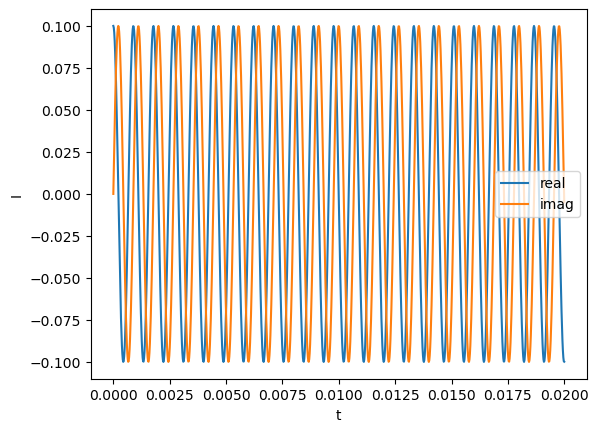

In [7]:
t = np.linspace(0, 0.02, 1000)
v0 = 10
#omega = 1000.0
omega = 7071.0678
R = 100
L = 2e-3
C = 10e-6

V = v0*np.exp(1j*omega*t)
ZR = R
ZL = 1j*omega*L
ZC = 1/(1j*omega*C)

Z = ZR + ZL + ZC

print('Complex impedance = ', Z)

phase_angle = np.arctan((omega*L - 1/(omega*C))/R)
print('Phase angle = ', phase_angle*180/np.pi)

I = V/Z

plt.plot(t, np.real(I), label='real')
plt.plot(t, np.imag(I), label='imag')
plt.xlabel('t')
plt.ylabel('I')
plt.legend()
plt.show()

Phase angle =  -2.7193666193200712e-08


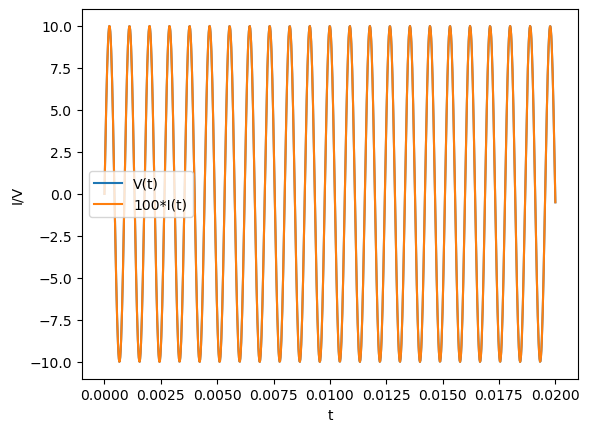

In [8]:
plt.plot(t, np.imag(V), label='V(t)')
plt.plot(t, 100*np.imag(I), label='100*I(t)')
plt.xlabel('t')
plt.ylabel('I/V')
plt.legend()

phase_angle = np.arctan((omega*L - 1/(omega*C))/R)
print('Phase angle = ', phase_angle*180/np.pi)

plt.show()

In [9]:
omega_range = np.linspace(100, 1000100, 1000)
Q = []
for omega_val in omega_range:
    V = v0*np.exp(1j*omega_val*t)
    Z = R + 1j*omega_val*L + 1/(1j*omega_val*C)
    I = V/Z
    Q.append(R*abs(I)/abs(V))

Resonance frequency =  7071.067811865475


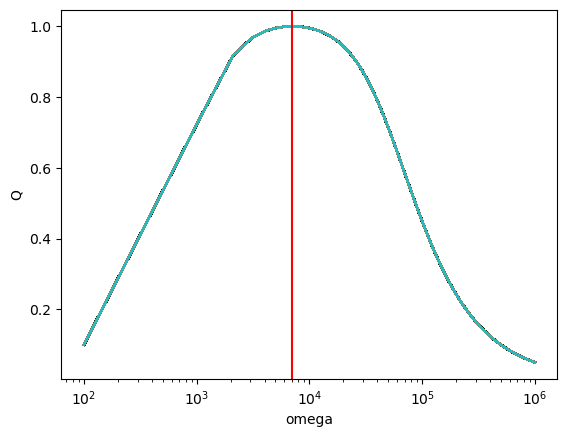

In [10]:
plt.plot(omega_range, Q)
plt.xscale('log')
plt.xlabel('omega')
plt.ylabel('Q')

omega_res = 1/np.sqrt(L*C)
print('Resonance frequency = ', omega_res)
# plot a vertical line at the resonance frequency

plt.axvline(omega_res, color='r')

plt.show()